# Programming Assignment 5 - Logistic Regression 

In the assignment, you will use gradient ascent to find the weights for the logistic regression problem.   

As an example, we will use the widely-used breast cancer data set.  This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin

Each sample is a collection of features that were manually recorded by a physician upon inspecting a sample of cells from fine needle aspiration.  The goal is to detect if the cells are benign or malignant.

### Name: Jiaqi Li                Net ID: jl9555      University ID: N14088502 
### Name: Xiahao Zhang     Net ID: xz2456    University ID: N14493597


## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

In [1]:
# Importing important libraries
from sklearn.datasets import load_breast_cancer # taking included data set from Sklearn http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [2]:
# Loading the dataset
cancer = load_breast_cancer()
y = cancer.target
X = cancer.data

In [3]:
# Printing the shape of data (X) and target (Y) values 
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing
#### Splitting the data into train and test before scaling the dataset


In [4]:
# train_test_split to split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

#### Scale the data since we will be using gradient ascent

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# TODO - Print the shape of x_train and y_train 
print(X_train.shape) # It should print (426, 30)
print(y_train.shape) # It should print (426,)

(426, 30)
(426,)


#### Adding a column of ones to the  matrices $X_{train}$ and  $X_{test}$
After adding a column of ones $X_{train}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$

Similarly for $X_{test}$

In [7]:
# Append a column of ones to x_train 

# Step 1: Create a column vector of ones (i.e. a vector of shape N',1)
ones = np.ones(X_train.shape[0]).reshape((X_train.shape[0], 1))
# Step 2: Append a column of ones in the beginning of x_train
X_train = np.hstack((ones, X_train))

# Now do the same for the test data
# Step 1: Create a column vector of ones (i.e. a vector of shape N",1)
ones = np.ones(X_test.shape[0]).reshape((X_test.shape[0], 1))
# Stemp 2: Append a column of ones in the beginning of x_test
X_test = np.hstack((ones, X_test))


# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The trainng data has dimensions: ", X_train.shape, ". The testing data has dimensions: ",X_test.shape)
# Looking at the first two rows of X_train to check everything worked as expected
print(X_train[0:2])

The trainng data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -0.34913849 -1.43851335 -0.41172595 -0.39047943 -1.86366229
  -1.26860704 -0.82617052 -0.95286585 -1.72936805 -0.9415409  -0.86971355
  -1.35865347 -0.83481506 -0.57230673 -0.74586846 -0.65398319 -0.52583524
  -0.94677147 -0.53781728 -0.63449458 -0.54268486 -1.65565452 -0.58986401
  -0.52555985 -1.51066925 -0.89149994 -0.75021715 -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.31264011 -0.13367256 -0.27587995  1.07807258
   0.86354605  0.72631375  0.89844062  1.17876963  1.47437716 -0.04022275
  -0.50962253  0.10947722 -0.13472838 -0.52489487 -0.14934475  0.07460028
   0.23747244 -0.43028253  0.08289146  0.04148684  0.68989862  0.19412774
  -0.05193356  1.12941497  0.92394223  1.22221738  1.43655962  1.14955889
   1.56911143]]


### Understanding the dataset

In [8]:
# Printing the names of all the features
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
# You can add your own code here to better understand the dataset


# Step 2: Fitting the model
## Implementing Logistic Regression Using Gradient Ascent


 Before writing the gradient ascent code, first write some helpful functions


 
### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [10]:
# TODO - Write the sigmoid function (z can be a scalar or a vector)
def sigmoid(z):
    ## TODO
    temp1 = np.exp(z)
    return temp1 / (1 + temp1)
    ## 

In [11]:
# VERIFY - Sigmoid of 0 should be equal to half
print(sigmoid(0))

0.5


### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ to any values.)

In [12]:
# Initialize parameters w
w = np.zeros((X_train.shape[1], 1))
print(w.shape)

(31, 1)


### Our hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

In [13]:
# predict the probability that a patient has cancer 
# TODO - Write the hypothesis function 
def hypothesis(X , w):
    #TODO
    res = sigmoid(X.dot(w))
    return res
    ##

Before moving on, do a quick check that your function can accpet a matrix as an argument. 

In [14]:
# Compute y_hat using our training examples and w (w is still set to zero).  
# This is just a preliminary test of the hypotheis function
yhat = hypothesis(X_train, w)

# print the sizes of yhat and y as a first check that the function performed correctly
print(yhat.shape) # this should return (426, 1)
print(y_train.shape) # this should return (426,)

(426, 1)
(426,)


### Log-Likelihood Function.
Write the code to calculate the log likelihood function $\ell({\bf w})=
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [15]:
# TODO - Write the log likelihood function 
def log_likelihood(X , y , w ):
    ##TODO
    h = hypothesis(X, w)
    log_likelihood = y.T.dot(np.log(h)) + (1-y.T).dot(np.log(1-h))
    res = log_likelihood.item()
    ##
    return res

Before moving on, do a quick check of your log_likelihood function

In [16]:
# VERIFY - The value should be equal to -295.2806989185367.
print(log_likelihood(X_train,y_train.T,w))

-295.2806989185367


# Gradient Ascent
Now write the code to perform gradient ascent.  You will use the update rule from the lecture notes.

In [17]:
# TODO - Write the gradient ascent function 
def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    # For every 100 iterations, store the log_likelihood for the current w
    # Initializing log_likelihood to be an empty list  
    log_likelihood_values = []
    # Initialize w to be a zero vector of shape x_train.shape[1],1
    w = np.zeros((X.shape[1], 1))
    # Initialize N to the number of training examples
    N = X.shape[0] 
    ## TODO 
    y = y.reshape((y.shape[0], 1))
    for i in range(num_iters):
        h = hypothesis(X, w)
        g = X.T.dot(y-h)
        w = w + learning_rate / N * g
        
        if (i % 100) == 0:
            log_likelihood_values.append(log_likelihood(X,y,w))
        
    return w, log_likelihood_values

### After completing the code above, run the following

In [18]:
learning_rate = 0.5
num_iters = 5000 # The number of iteratins to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)
print(w)
# print(log_likelihood_values)

[[-0.1056701 ]
 [-0.03553097]
 [-0.0536691 ]
 [ 0.17221516]
 [-0.31116366]
 [-0.45434972]
 [ 2.75131896]
 [-1.30570826]
 [-3.03314808]
 [ 1.16803283]
 [-0.85636742]
 [-3.72793978]
 [ 0.72266145]
 [-0.80953786]
 [-2.47051644]
 [-0.40297532]
 [ 0.53078335]
 [ 0.03099043]
 [-1.27545053]
 [ 1.31001975]
 [ 2.1018566 ]
 [-1.64716699]
 [-2.84431473]
 [-0.20035616]
 [-1.77971341]
 [-0.16157425]
 [ 0.73553297]
 [-2.45713669]
 [-1.31520556]
 [-2.99931319]
 [-0.38232592]]


In [19]:
print(log_likelihood_values)

[-104.34561005259049, -30.613421040599746, -26.679954427411648, -24.76478769939299, -23.544913930501746, -22.668618640929342, -21.995874538657674, -21.45672990771387, -21.00947210360731, -20.627251944141683, -20.292743277182158, -19.994625484608697, -19.725219641902154, -19.479089646022707, -19.25224210193075, -19.041653725735568, -18.84497827588524, -18.66035663838307, -18.48628923971799, -18.32154774276664, -18.165112366906538, -18.016126409492387, -17.873862603144918, -17.737697795406575, -17.607093594208827, -17.481581364550607, -17.360750448842474, -17.244238809830662, -17.13172551798442, -17.022924660136162, -16.91758035547014, -16.815462643191953, -16.71636406294889, -16.620096790720147, -16.52649022381665, -16.435388931827752, -16.346650907929995, -16.260146068414898, -16.175754958663532, -16.093367631862144, -16.012882673077193, -15.93420634630246, -15.857251846063118, -15.781938638342005, -15.70819187815538, -15.635941893182656, -15.56512372454738, -15.495676717234817, -15.42

# Plotting Likelihood v/s Number of Iterations.

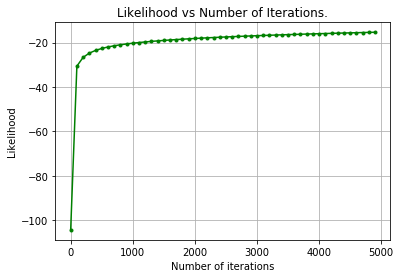

In [20]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(1,num_iters,100))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

You should see the likelihood increasing as number of Iterations increase.
With the learning rate = 0.5 and the number of iterations = 5000, we can see that the curve of the number of iterations on every 100 iteration’s finally converges.

### The rest of your code goes here

In [21]:
# predicted results
def predict(X_test, y_test, w, threshold):
    label = hypothesis(X_test, w)
    positive = label >= threshold
    negative = label < threshold
    label[positive] = 1
    label[negative] = 0
    # label = [0 if l < threshold else 1 for l in label]
    return label.reshape((1, -1))[0]

y_predicted = predict(X_test, y_test, w, 0.5)
print(y_predicted)

[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.]


# Step 3: Evaluating your model

###  We assume Malignant (label 0) as **Positive**,  Benign(label 1) as **Negative**. 
###  TP(correct_M) TN(correct_B) FP(false_M) FN(false_B)

In [22]:
def evaluate(y_predicted, X_test, y_test):
    correct_M = 0
    false_M = 0
    correct_B = 0
    false_B = 0
    for i in range(X_test.shape[0]):
        # Malignant
        if y_test[i] == 0:
            if y_test[i] == y_predicted[i]:
                correct_M += 1
            else:
                false_B += 1
        # Benign
        else:
            if y_test[i] == y_predicted[i]:
                correct_B += 1
            else:
                false_M += 1
        
    plt.figure()
    col_labels = ['predict_pos', 'predict_neg']
    row_labels = ['actual_pos', 'actual_neg']
    table_vals = [[correct_M, false_B], [false_M, correct_B]]
    colors = ['red', 'green']
    my_table = plt.table(cellText=table_vals, colWidths=[0.38] * 2, rowLabels=row_labels, colLabels=col_labels,
                         rowColours=colors, colColours=colors, loc='center right')
    plt.title('Confusion Matrix')
    plt.show()
    
    if correct_M == 0 or correct_B == 0:
        return 0, 0
    
    precision = correct_M / (correct_M + false_M)
    recall = correct_M / (correct_M + false_B)
    print("The value of Precision is: {}".format(precision))
    print("The value of Recall is: {}".format(recall))
    
    accuracy = (correct_M + correct_B) / X_test.shape[0]
    print("The value of Accuracy is: {}".format(accuracy))

    f1_score = 2 * (precision * recall) / (precision + recall)
    print("The value of F1-score is: {}".format(f1_score))
    print()
    
    return accuracy, f1_score

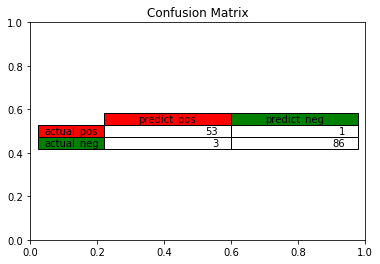

The value of Precision is: 0.9464285714285714
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.972027972027972
The value of F1-score is: 0.9636363636363636



(0.972027972027972, 0.9636363636363636)

In [23]:
evaluate(y_predicted, X_test, y_test)

###  Find a better hyperparameter of threshold 

Threshold is: 0.0


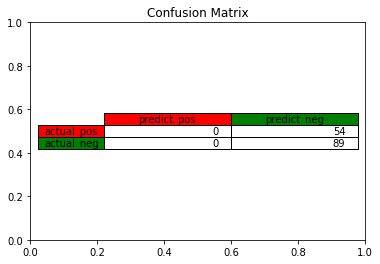


Threshold is: 0.05263157894736842


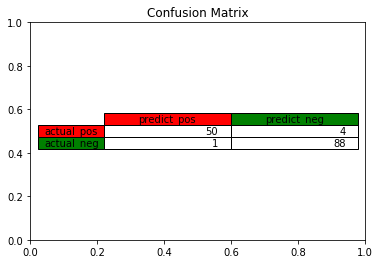

The value of Precision is: 0.9803921568627451
The value of Recall is: 0.9259259259259259
The value of Accuracy is: 0.965034965034965
The value of F1-score is: 0.9523809523809523


Threshold is: 0.10526315789473684


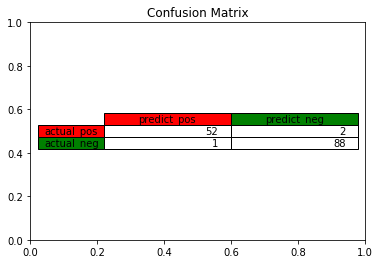

The value of Precision is: 0.9811320754716981
The value of Recall is: 0.9629629629629629
The value of Accuracy is: 0.9790209790209791
The value of F1-score is: 0.9719626168224299


Threshold is: 0.15789473684210525


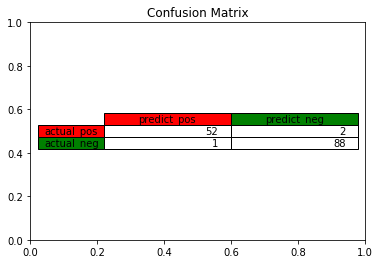

The value of Precision is: 0.9811320754716981
The value of Recall is: 0.9629629629629629
The value of Accuracy is: 0.9790209790209791
The value of F1-score is: 0.9719626168224299


Threshold is: 0.21052631578947367


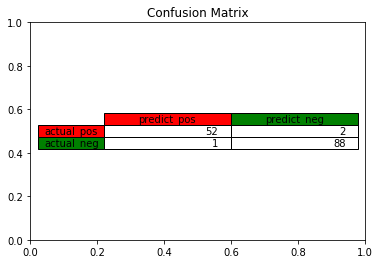

The value of Precision is: 0.9811320754716981
The value of Recall is: 0.9629629629629629
The value of Accuracy is: 0.9790209790209791
The value of F1-score is: 0.9719626168224299


Threshold is: 0.2631578947368421


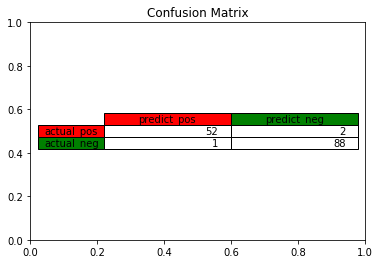

The value of Precision is: 0.9811320754716981
The value of Recall is: 0.9629629629629629
The value of Accuracy is: 0.9790209790209791
The value of F1-score is: 0.9719626168224299


Threshold is: 0.3157894736842105


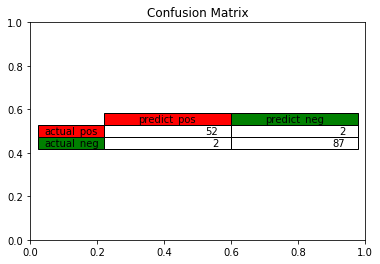

The value of Precision is: 0.9629629629629629
The value of Recall is: 0.9629629629629629
The value of Accuracy is: 0.972027972027972
The value of F1-score is: 0.9629629629629629


Threshold is: 0.3684210526315789


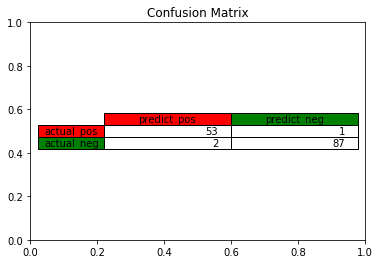

The value of Precision is: 0.9636363636363636
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.9790209790209791
The value of F1-score is: 0.9724770642201834


Threshold is: 0.42105263157894735


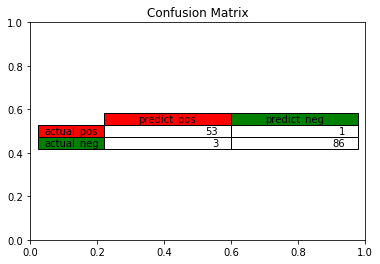

The value of Precision is: 0.9464285714285714
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.972027972027972
The value of F1-score is: 0.9636363636363636


Threshold is: 0.47368421052631576


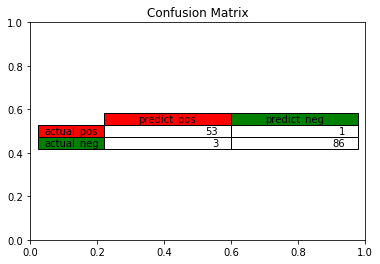

The value of Precision is: 0.9464285714285714
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.972027972027972
The value of F1-score is: 0.9636363636363636


Threshold is: 0.5263157894736842


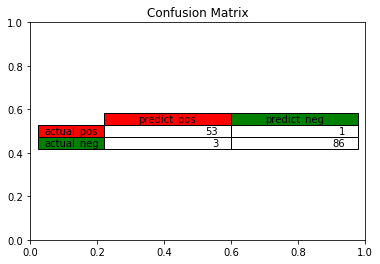

The value of Precision is: 0.9464285714285714
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.972027972027972
The value of F1-score is: 0.9636363636363636


Threshold is: 0.5789473684210527


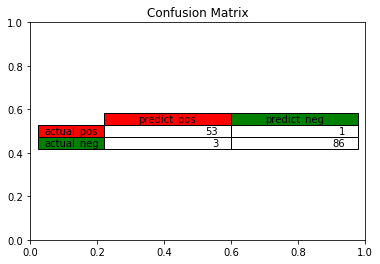

The value of Precision is: 0.9464285714285714
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.972027972027972
The value of F1-score is: 0.9636363636363636


Threshold is: 0.631578947368421


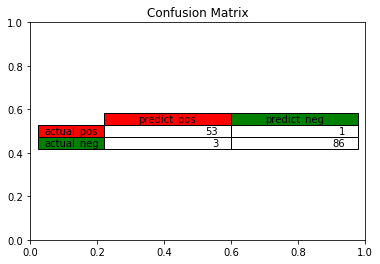

The value of Precision is: 0.9464285714285714
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.972027972027972
The value of F1-score is: 0.9636363636363636


Threshold is: 0.6842105263157894


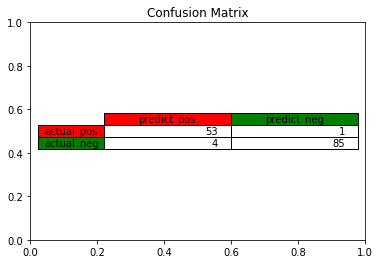

The value of Precision is: 0.9298245614035088
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.965034965034965
The value of F1-score is: 0.954954954954955


Threshold is: 0.7368421052631579


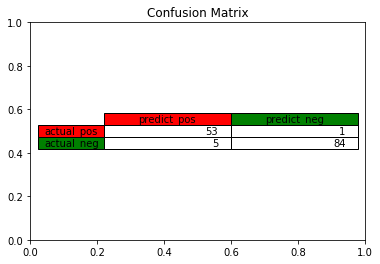

The value of Precision is: 0.9137931034482759
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.958041958041958
The value of F1-score is: 0.9464285714285714


Threshold is: 0.7894736842105263


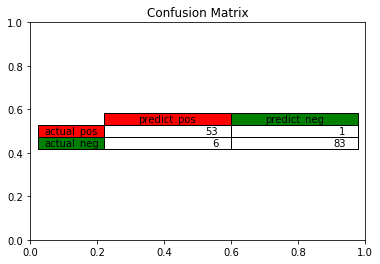

The value of Precision is: 0.8983050847457628
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.951048951048951
The value of F1-score is: 0.9380530973451328


Threshold is: 0.8421052631578947


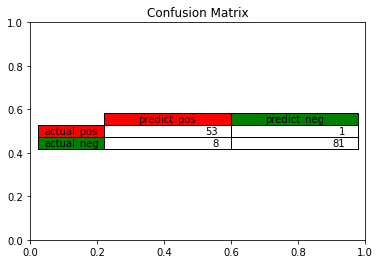

The value of Precision is: 0.8688524590163934
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.9370629370629371
The value of F1-score is: 0.9217391304347826


Threshold is: 0.894736842105263


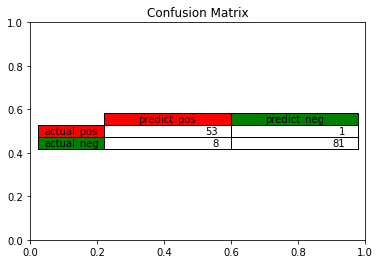

The value of Precision is: 0.8688524590163934
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.9370629370629371
The value of F1-score is: 0.9217391304347826


Threshold is: 0.9473684210526315


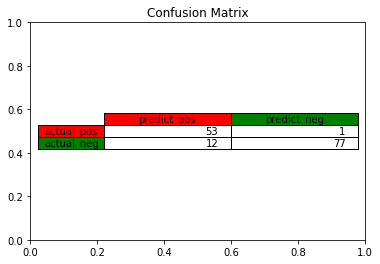

The value of Precision is: 0.8153846153846154
The value of Recall is: 0.9814814814814815
The value of Accuracy is: 0.9090909090909091
The value of F1-score is: 0.8907563025210083


Threshold is: 1.0


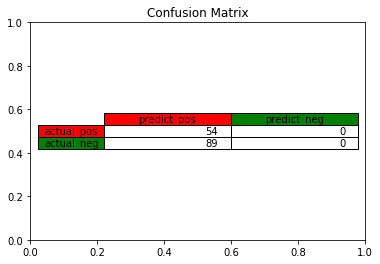

In [24]:
res_accuracy = []
res_f1_score = []
for t in np.linspace(0,1,20):
    y_predicted = predict(X_test, y_test, w, t)
    print("Threshold is: {}".format(t))
    (accuracy, f1_score) = evaluate(y_predicted, X_test, y_test)
    print()
    if accuracy == 0:
        continue
    res_accuracy.append([t, accuracy])
    res_f1_score.append([t, f1_score])

# print(res_t)

In [25]:
res_t1 = np.array(res_accuracy)
x1 = res_t1[:,0]
y1 = res_t1[:,1]
res_t2 = np.array(res_f1_score)
x2 = res_t2[:,0]
y2 = res_t2[:,1]

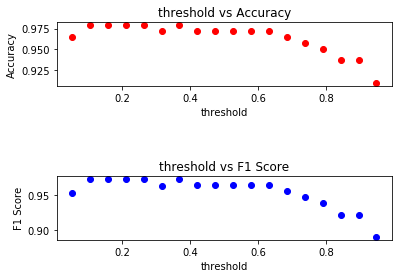

In [26]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(x1, y1, 'ro')
plt.title('threshold vs Accuracy')
plt.xlabel('threshold')
plt.ylabel('Accuracy')

plt.subplot(3,1,3)
plt.plot(x2, y2, 'bo')
plt.title('threshold vs F1 Score')
plt.xlabel('threshold')
plt.ylabel('F1 Score')
plt.show()

In [27]:
res_accuracy.sort(key=lambda x: x[1], reverse=True)
print("The highest accuracy is: {}".format(res_accuracy[0][1]))
res_f1_score.sort(key=lambda x: x[1], reverse=True)
print("The highest F1 score is: {}".format(res_f1_score[0][1]))

candidate_accuracy = []
candidate_f1_score = []
for i in range(0, len(res_accuracy)):
    if res_accuracy[i][1] == res_accuracy[0][1]:
        candidate_accuracy.append(res_accuracy[i][0])
for i in range(0, len(res_accuracy)):
    if res_f1_score[i][1] == res_f1_score[0][1]:
        candidate_f1_score.append(res_f1_score[i][0])
        
ret = list(set(candidate_accuracy).intersection(set(candidate_f1_score)))
for item in ret:
    print("The candidate of threshold is: {}".format(item))

The highest accuracy is: 0.9790209790209791
The highest F1 score is: 0.9724770642201834
The candidate of threshold is: 0.3684210526315789


## With the learning rate = 0.5 and the number of iterations = 5000, we can see that the curve of the number of iterations on every 100 iteration’s finally converges. So these two hyper-paramters will remain the same. However the threshold should be changed into 0.3684 to get a better perfomance.